In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

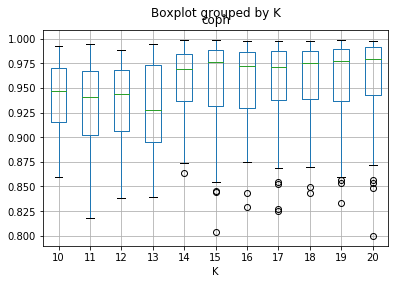

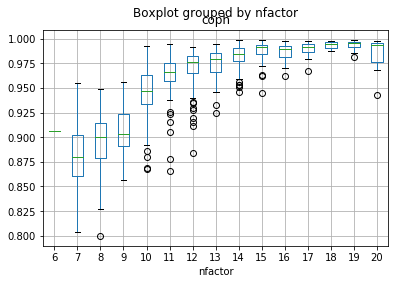

In [60]:

fn = 'output/choose_para.txt'
result = pd.read_csv(fn, sep='\t')
result['nfactor'] = [round(x) for x in result['nfactor']]
result.boxplot(by = 'K', column = 'coph')

result.boxplot(by = 'nfactor', column = 'coph')

output/sn_spMF_K17_a1100_l190/sn_spMF_FactorMatrix_K17_a1100_l190_Run7.txt


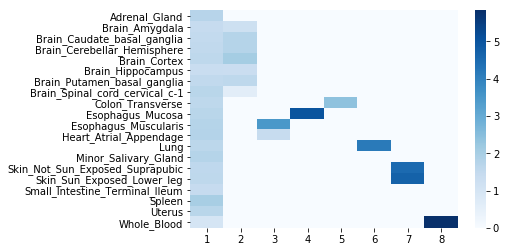

,K,alpha1,lambda1,coph,correlation,nfactor,optimal_run,optimal_obj
429,17,100,90,0.954542,2.922810,7,7,56978.839243
434,18,50,100,0.955777,3.404028,9,5,47548.516782
428,18,100,40,0.954444,3.425596,10,21,44432.432271
485,15,50,90,0.961932,3.454837,10,27,45931.356814
453,20,50,100,0.958449,3.465133,10,13,47402.891461
417,15,90,40,0.951719,3.498986,10,29,42822.890528
411,18,90,40,0.950998,3.505155,10,4,42476.834636
504,19,90,40,0.964529,3.513836,10,7,43092.461837
460,15,50,80,0.958963,3.515201,10,28,43689.244268
414,19,70,60,0.951509,3.520553,10,13,44853.121533


In [62]:
## pick a range of K based on the median cophenetic coefficient > 0.95

res = result[result['K'] >= 15] 
res = res[res['coph'] >= 0.95] ## tried 0.95, 0.96, 0.97 - result in the same optimal solution
res = res.sort_values('correlation')

i = 0
K = str(int(res.iloc[i]['K']))
a1 = str(int(res.iloc[i]['alpha1']))
l1 = str(int(res.iloc[i]['lambda1']))
run_idx = str(int(res.iloc[i]['optimal_run']))

factor = 'K%s_a1%s_l1%s' % (K, a1, l1)
ffn = 'output/sn_spMF_%s/sn_spMF_FactorMatrix_%s_Run%s.txt' % (factor, factor, run_idx)
print(ffn)
fM = pd.read_csv(ffn, sep='\t')


sns.heatmap(fM, cmap = 'Blues')
plt.show()
plt.close()

res